# Lab1 - Scikit-learn
Author: *Rahian Islam*

## Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?
2. For each task (classification and regression), which model performs best on the validation data using two principal components?
3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?
4. Do any of the models underfit or overfit? Provide examples.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Function definitions

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



def get_classifier_accuracy(model, X, y):
    
    
    '''Calculate train and validation accuracy of classifier (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training accuracy, validation accuracy
    
    '''
    
    #TODO: IMPLEMENT FUNCTION BODY
    X_train, x_test, Y_train, y_test = train_test_split(X, y, random_state = 956 )
    model.fit(X_train, Y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(X_train)
    V_acc = accuracy_score(y_test, y_pred_test)
    T_acc = accuracy_score(Y_train, y_pred_train )
    


    return round(T_acc,3), round(V_acc,3)



In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y):
    
    
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    
    '''
   
    #TODO: IMPLEMENT FUNCTION BODY
    
    
    X_train, x_test, Y_train, y_test = train_test_split(X, y, random_state = 956 )
    model.fit(X_train, Y_train)    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(X_train)
    V_acc=mean_squared_error(y_test, y_pred_test)
    T_acc=mean_squared_error(Y_train, y_pred_train)
    

    return round(T_acc,1), round(V_acc,1)



In [5]:
from sklearn.decomposition import PCA

def get_n_principal_components(X, n=2):
    '''Extracts n principal componets from feature matrix X using sklearn PCA.
        X (pandas.DataFrame): A feature matrix
        n (int): number of principal components
        
        returns: feature matrix with n columns as numpy.array
    '''
    
    #TODO: IMPLEMENT FUNCTION BODY
    model = PCA(n_components = n)
    model.fit(X)
    Feat_mat = model.transform(X)
    

    
    return Feat_mat

## Classification

Using yellowbrick spam - classification  
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

The goal is to compare `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` classification performance on a validation set with full features and first two principal components.

### Load data

Load the spam data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.


In [6]:
# TODO: ADD YOUR CODE HERE
import yellowbrick.datasets
ab = yellowbrick.datasets.loaders.load_spam(data_home=None, return_dataset=False)
X = ab[0]
y = ab[1]
X_2D = get_n_principal_components(X)

print(X.shape,y.shape, X_2D.shape)
type(X)
type(y)
type(X_2D)




ModuleNotFoundError: No module named 'yellowbrick'

### Train and evaluate models

1. Import `LogisticRegression` and `RandomForestClassifier` from sklearn
2. Instantiate models `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_classifier_accuracy()` using all features, i.e. `X`.
    - Call `get_classifier_accuracy()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **3 decimal places**.

In [190]:
# TODO: ADD YOUR CODE HERE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = [LogisticRegression(max_iter = 2000),RandomForestClassifier(random_state=88)]





for model in models:
    

    print('{} using all features: (Training score, Validation score): {}'.format(model.__class__.__name__,get_classifier_accuracy(model, X, y)))
    print('{} using PCA features: (Training score, Validation score): {}'.format(model.__class__.__name__,get_classifier_accuracy(model, X_2D, y)))





LogisticRegression using all features: (Training score, Validation score): (0.935, 0.918)
LogisticRegression using PCA features: (Training score, Validation score): (0.729, 0.725)
RandomForestClassifier using all features: (Training score, Validation score): (0.999, 0.944)
RandomForestClassifier using PCA features: (Training score, Validation score): (0.999, 0.771)


### Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the lables in `y` as `hue`.

Label x- and y-axis and add a title.

Text(0.5, 0, 'PCA0')

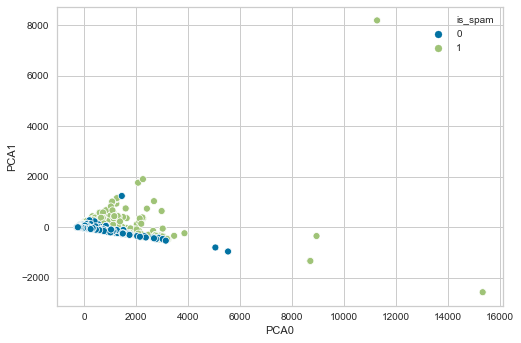

In [192]:
# TODO: ADD YOUR CODE HERE

sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y)
plt.ylabel('PCA1')
plt.xlabel('PCA0')

## Regression

Using yellowbrick energy - regression  
https://www.scikit-yb.org/en/latest/api/datasets/energy.html

The goal is to compare `LinearRegression()` and `RandomForestRegressor(random_state=88)` regression performance on a validation set with full features and first two principal components.

### Load data

Load the energy data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.

In [193]:
# TODO: ADD YOUR CODE HERE

# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression




from yellowbrick.datasets import load_energy
cd = yellowbrick.datasets.loaders.load_energy(data_home=None, return_dataset=False)

X = cd[0]
y = cd[1]
X_2D = get_n_principal_components(X)
print(X.shape,y.shape, X_2D.shape)
type(X)
type(y)
type(X_2D)

# model = LinearRegression()
# X_train, x_test, Y_train, y_test = train_test_split(X, y, random_state = 956 )
# model.fit(X_train, Y_train)
# y_pred_test = model.predict(x_test)
# y_pred_train = model.predict(X_train)
# print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape, y_pred_test.shape)
# mean_squared_error(y_test, y_pred_test)
# mean_squared_error(Y_train, y_pred_train)

(768, 8) (768,) (768, 2)


numpy.ndarray

### Train and evaluate models

1. Import `LinearRegression` and `RandomForestRegressor` from sklearn
2. Instantiate models `LinearRegression()` and `RandomForestRegressor(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_regressor_mse()` using all features, i.e. `X`.
    - Call `get_regressor_mse()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **1 decimal place**.

In [194]:
# TODO: ADD YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(),RandomForestRegressor(random_state=88)] 
a = get_regressor_mse(LinearRegression(), X, y)
a
for model in models:
    print('{} using all features: (Training MSE score, Validation MSE score): {}'.format(model.__class__.__name__,get_regressor_mse(model, X, y)))
    print('{} using PCA features: (Training MSE score, Validation MSE score): {}'.format(model.__class__.__name__,get_regressor_mse(model, X_2D, y)))
    

LinearRegression using all features: (Training MSE score, Validation MSE score): (7.9, 10.3)
LinearRegression using PCA features: (Training MSE score, Validation MSE score): (22.2, 19.6)
RandomForestRegressor using all features: (Training MSE score, Validation MSE score): (0.0, 0.2)
RandomForestRegressor using PCA features: (Training MSE score, Validation MSE score): (9.6, 8.6)


### Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the values in `y` as `hue` and `size`.

Label x- and y-axis and add a title.

Text(0.5, 0, 'PCA0')

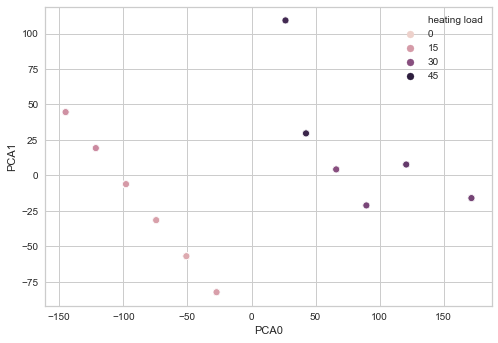

In [197]:
# TODO: ADD YOUR CODE HERE
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y)
plt.ylabel('PCA1')
plt.xlabel('PCA0')

## Observations/Interpretation

### Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?

**Classification:**  
*According to the calculation above, LogisticRegression is 91.8 % accurate whereas RandomForestClassifier is 94.4% accurate, hence RandomForestClassifier is more accurate*

**Regression:**
*According to the calculation above, LinearRegression produces a validation score of 10.3 whereas RandomForestRegressor produces 0.2 , hence RandomForestRegressor is more accurate*

2. For each task (classification and regression), which model performs best on the validation data using two principal components?

**Classification:**
*According to the calculation above, LogisticRegression is 72.5 % accurate whereas RandomForestClassifier is 77.1% accurate, hence RandomForestClassifier is more accurate*

**Regression:**
*According to the calculation above, LinearRegression produces a validation score of 19.6 whereas RandomForestRegressor produces 8.6 , hence RandomForestRegressor is more accurate*

3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?

**Classification:**
*Both the models have better validation score when its using full feature rather than 2 principal component model*

**Regression:**
*Both the models have better validation score when its using full feature rather than 2 principal component model*

4. Do any of the models underfit or overfit? Provide examples.

**Underfitting** 
*Both classification models LogisticRegression and RandomForestClassifier have very similar accuracy scores for training and validation which inidicates it has low variance. Hence it is underfitting*

**Overfitting** 
*The model RandomForestClassifier when used with the 2 principal component produces a perfect training score of 99.9% but the validation score is of 77.1% which suggests that it's overfitting*
 
### Conclusion
*From the analysis it is pretty evident that if we use all the features instead of 2 principal components, our analysis will be more accurate with all the models, as we get better validation scores for all the models using all the features.*  


## Reflection

*This was my first machine learning experince and to be very honest it was very enjoyable. I was scared before the semester started and I thought I will be overwhelmed by all the new information like I was when I first started programming but the way we are taught in the class with examples and having the option to look back at our class really helped*